In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
# 데이터 로드
iris = datasets.load_iris()
X = iris.data[:, 2:]  # 처음 두 feature만 사용(petal length, petal width)
y = iris.target

# Train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### K 값에 따른 정확도 확인

In [ ]:
# k값에 따른 Accuracy 확인
k_values = [2, 4, 6, 8, 10, 12]

# 정확도를 저장할 리스트
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"K={k}, Accuracy={accuracy:.4f}")

K=2, Accuracy=1.0000
K=4, Accuracy=1.0000
K=6, Accuracy=1.0000
K=8, Accuracy=1.0000
K=10, Accuracy=1.0000
K=12, Accuracy=1.0000


In [ ]:
# # 정확도 시각화
# plt.figure(figsize=(10, 6))
# sns.lineplot(x=k_values, y=accuracies, marker='o')
# plt.xlabel('K value')
# plt.ylabel('Accuracy')
# plt.title('KNN Accuracy for Different K Values')
# plt.show()

In [ ]:
# 결정 경계를 그리는 함수
def plot_decision_boundary(ax, clf, X, y, k, accuracy):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    style=iris.target_names[y], palette='deep', ax=ax)
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_title(f'K={k}, Accuracy={accuracy:.4f}')

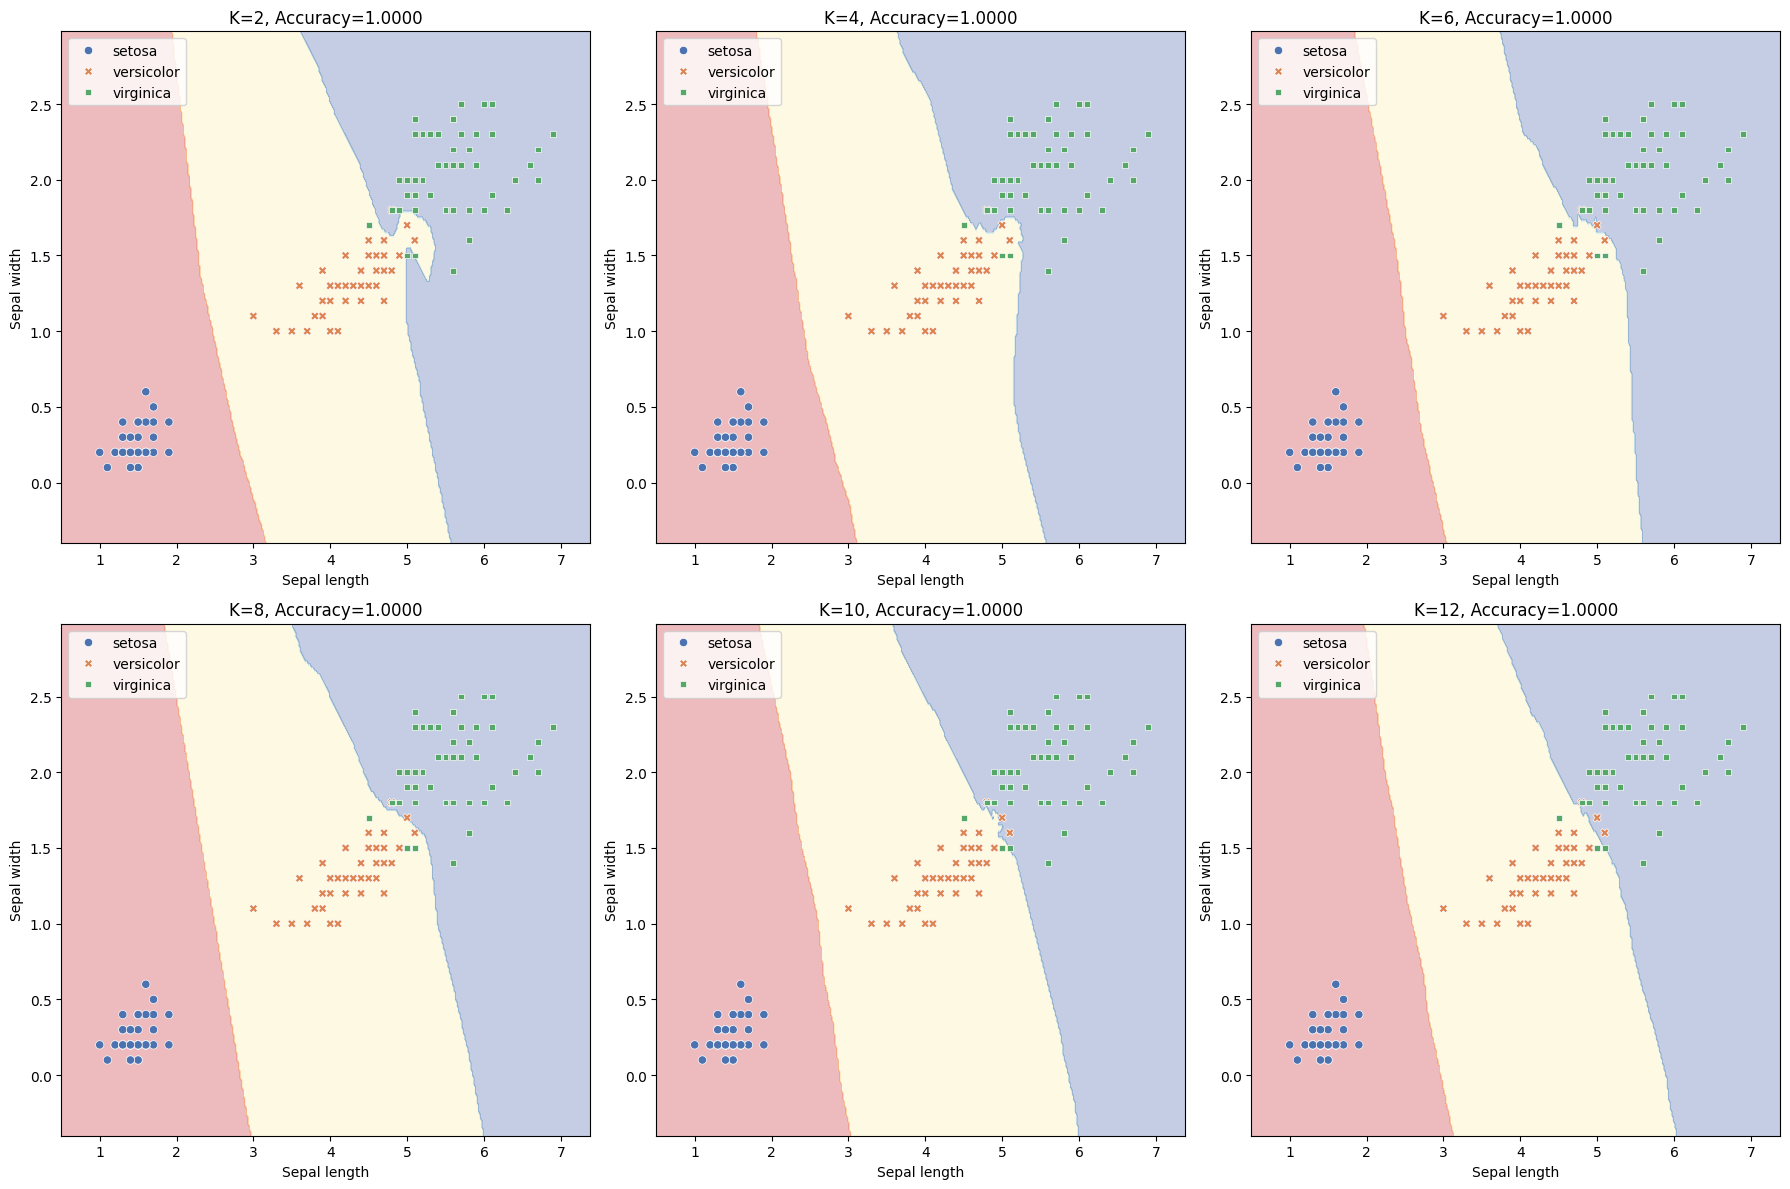

In [ ]:
# 각 k 값에 대해 KNN 모델 학습, 정확도 계산 및 결정 경계 시각화
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs = axs.ravel()

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    plot_decision_boundary(axs[i], knn, X, y, k, accuracy)

plt.tight_layout()
plt.show()

### 시각화: Sepal vs Petal

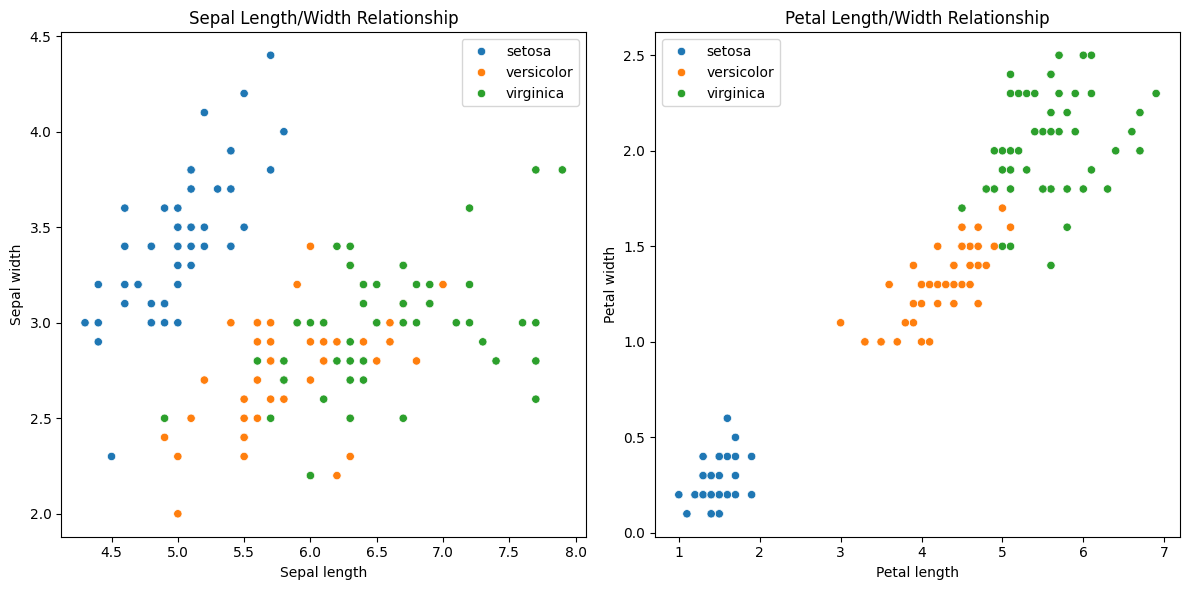

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x=iris.data[:, 0], y=iris.data[:, 1], hue=iris.target_names[iris.target], ax=axes[0])
axes[0].set_xlabel('Sepal length')
axes[0].set_ylabel('Sepal width')
axes[0].set_title('Sepal Length/Width Relationship')

sns.scatterplot(x=iris.data[:, 2], y=iris.data[:, 3], hue=iris.target_names[iris.target], ax=axes[1])
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[1].set_title('Petal Length/Width Relationship')

plt.tight_layout()
plt.show()